<h2>Лабораторная работа №8 - Методы кластеризации</h2>

<h4>Для начала необходимо сформировать данные</h4><br>
<p>Моя задача - сформировать кластеры компьютеров</p>
<p>Признаки:<br>
1. cores - количество процессорных ядер (шт.)<br>
2. clocks - максимальная частота ядра процессора на всех ядрах (GHz)<br>
</p>

<h3>Подключаю библиотеки</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h3>Создаю фрейм данных</h3>

In [2]:
data = pd.DataFrame(
    {
        "feature1": np.concatenate((np.random.random_sample((250, )), np.random.random_sample((250, )),
                                   np.random.random_sample((250, )) + 2, np.random.random_sample((250, )) + 2,
                                   np.random.random_sample((250, )) + 4), axis=0),
        "feature2": np.concatenate((np.random.random_sample((250, )), np.random.random_sample((250, )) + 2,
                                   np.random.random_sample((250, )), np.random.random_sample((250, )) + 2,
                                   np.random.random_sample((250, )) + 4), axis=0)
    }
)

In [3]:
data

,feature1,feature2
0,0.875985,0.634344
1,0.032049,0.408462
2,0.009096,0.616020
3,0.748593,0.775499
4,0.771959,0.335452
...,...,...
1245,4.342233,4.250240
1246,4.258236,4.243955
1247,4.105026,4.489345
1248,4.756765,4.846624


<h3>Создаю класс для решения задачи кластеризации методом <i>k-means</i></h3>

In [4]:
class KMeans():
    """
    Класс, сопоставляющий каждый объект с кластером методом k-means
    """
    def __init__(self):
        self.fitted = False
    
    def get_data_clusters(self, data, k):
        data = data.copy(deep=True)
        samples = data.shape[0]
        features_count = data.shape[1]
        self.k = k
        self.max_values = data.max(axis=0)
        
        data = data / self.max_values
        
        prev_centroids = np.random.random_sample((k, features_count))
        
        distances = np.zeros((samples, k)) # Расстояние от каждого семпла до центроида
        
        for cluster in range(k):
            distances[:, cluster] = ((data - prev_centroids[cluster]) ** 2).sum(axis=1) ** 0.5
                
        data_clusters = distances.argmin(axis=1)
        
        self.centroids = np.zeros(prev_centroids.shape)
        
        for i in range(k):
            self.centroids[i] = data[data_clusters == i].mean(axis=0)
        
        iteration = 0
        while self.__get_dist_between_centroids(prev_centroids, self.centroids) != 0:
            if(iteration % 20 == 0):
                print(f"Итерация {iteration}")
            prev_centroids = self.centroids
            self.centroids = np.zeros(prev_centroids.shape)

            for cluster in range(k):
                distances[:, cluster] = ((data - prev_centroids[cluster]) ** 2).sum(axis=1) ** 0.5
            
            data_clusters = distances.argmin(axis=1)

            for i in range(k):
                self.centroids[i] = data[data_clusters == i].mean(axis=0)
            
            #Изменение начальных центроидов если после 50 итераций не может поделить на кластеры
            if(iteration % 50 == 0):
                self.centroids = np.random.random_sample((k, features_count))
            iteration += 1
        
        cluster_centroids = dict()
        for i, col in enumerate(data.columns):
            cluster_centroids[col] = self.centroids[:, i] * self.max_values[i]
        cluster_centroids["cluster"] = np.arange(k)
        cluster_centroids = pd.DataFrame(cluster_centroids)
                
        data = data * self.max_values
        data["cluster"] = data_clusters
        
        return data, cluster_centroids
    
    def __get_dist_between_centroids(self, centr1, centr2):
        return ((centr1 - centr2) ** 2).sum()           
        

<h3>Вычисляю кластеры для данных при заданном значении кластеров, равным 5</h3>

Итерация 0
Итерация 20
Итерация 40
Итерация 60
Итерация 80
Итерация 100
Время выполнения:
Wall time: 2.13 s


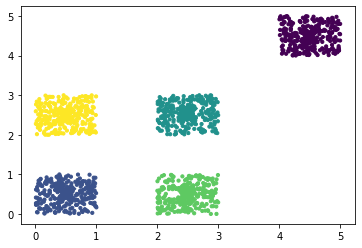

In [13]:
%%time
kmeans = KMeans()
clasterized_data, centroids_data = kmeans.get_data_clusters(data, 5)
plt.scatter(clasterized_data["feature1"], clasterized_data["feature2"], c=clasterized_data["cluster"], s=10)
plt.scatter(centroids_data["feature1"], centroids_data["feature2"], c=centroids_data["cluster"], marker="X", s=400)
print("Время выполнения:")

<h3>Вычисляю кластеры для данных при заданном значении кластеров, равным 4</h3>

Итерация 0
Время выполнения:
Wall time: 271 ms


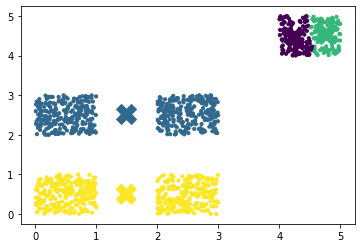

In [17]:
%%time
kmeans = KMeans()
clasterized_data, centroids_data = kmeans.get_data_clusters(data, 4)
plt.scatter(clasterized_data["feature1"], clasterized_data["feature2"], c=clasterized_data["cluster"], s=10)
plt.scatter(centroids_data["feature1"], centroids_data["feature2"], c=centroids_data["cluster"], marker="X", s=400)
print("Время выполнения:")

<h3>Вычисляю кластеры для данных при заданном значении кластеров, равным 3</h3>

Итерация 0
Время выполнения:
Wall time: 169 ms


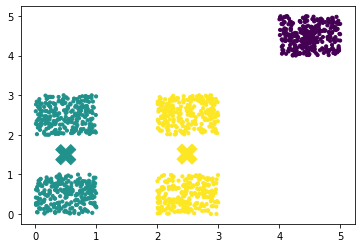

In [20]:
%%time
kmeans = KMeans()
clasterized_data, centroids_data = kmeans.get_data_clusters(data, 3)
plt.scatter(clasterized_data["feature1"], clasterized_data["feature2"], c=clasterized_data["cluster"], s=10)
plt.scatter(centroids_data["feature1"], centroids_data["feature2"], c=centroids_data["cluster"], marker="X", s=400)
print("Время выполнения:")

<h3>Вычисляю кластеры для данных при заданном значении кластеров, равным 2</h3>

Итерация 0
Время выполнения:
Wall time: 214 ms


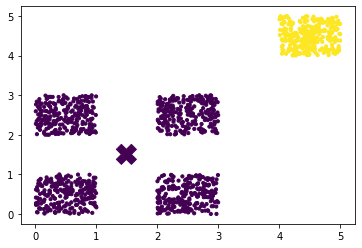

In [22]:
%%time
kmeans = KMeans()
clasterized_data, centroids_data = kmeans.get_data_clusters(data, 2)
plt.scatter(clasterized_data["feature1"], clasterized_data["feature2"], c=clasterized_data["cluster"], s=10)
plt.scatter(centroids_data["feature1"], centroids_data["feature2"], c=centroids_data["cluster"], marker="X", s=400)
print("Время выполнения:")

<h4>Вывод: Алгоритм работает так как предполагалось, при действительном значении кластеров равным заданному, он их находит</h4>

<h3>Создаю класс для решения задачи кластеризации методом <i>maxmin</i></h3>

In [8]:
class MaxMin:
    def __init__(self):
        pass
    
    def get_data_clusters(self, data):
        data = data.copy(deep=True)
        samples = data.shape[0]
        features_count = data.shape[1]
        self.max_values = data.max(axis=0)
        data = data / self.max_values
        
        self.prototypes = []
        self.prototypes.append(data.iloc[0, :])
        
        distances = ((data - self.prototypes[-1]) ** 2).sum(axis=1) ** 0.5 # Расстояние от каждого семпла до первого прототипа
        
        self.prototypes.append(data.iloc[np.argmax(distances), :])
        
        tresshold = ((self.prototypes[-2] - self.prototypes[-1]) ** 2).sum() ** 0.5 / 2
        
        proto_count = 2
        new_proto_count = 2
        while True:
            distances = np.zeros((samples, len(self.prototypes)))
            for cluster in range(len(self.prototypes)):
                distances[:, cluster] = ((data - self.prototypes[cluster]) ** 2).sum(axis=1) ** 0.5
            data_clusters = distances.argmin(axis=1)
            
            proto_count = new_proto_count
            for i in range(len(self.prototypes)):
                proto_data = data[data_clusters == i]
                proto_distances = ((proto_data - self.prototypes[i]) ** 2).sum() ** 0.5
                farest_sample = proto_data.iloc[np.argmax(proto_distances), :]
                dsts = []
                for j in range(len(self.prototypes)):
                    dsts.append(((farest_sample - self.prototypes[j]) ** 2).sum() ** 0.5)
                if all([dst < tresshold for dst in dsts]):
                    self.prototypes.append(farest_sample.to_numpy())
                    new_proto_count += 1
                    break
            if proto_count == new_proto_count:
                break
        
        distances = np.zeros((samples, len(self.prototypes)))
        for cluster in range(len(self.prototypes)):
            distances[:, cluster] = ((data - self.prototypes[cluster]) ** 2).sum(axis=1) ** 0.5
        data_clusters = distances.argmin(axis=1)
        data = data * self.max_values
        
        data["cluster"] = data_clusters
        return data
        

Время выполнения:
Wall time: 72.1 ms


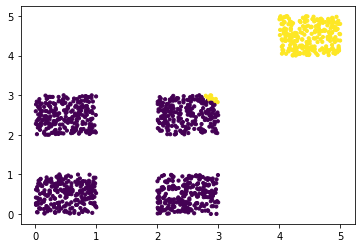

In [9]:
%%time
maxmin = MaxMin()
clusterized_data = maxmin.get_data_clusters(data)
plt.scatter(clusterized_data["feature1"], clusterized_data["feature2"], c=clusterized_data["cluster"], s=10)
print("Время выполнения:")

<h4>Алгоритм максимина выделяет только 2 кластера и выполняется быстрее чем knn</h4>